In [2]:
import pandas as pd

# Load the uploaded CSV file to inspect its structure
file_path = r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\project\seattle-weather.csv'
weather_data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset to understand its structure
weather_data_info = weather_data.info()
weather_data_head = weather_data.head()

weather_data_info, weather_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


(None,
          date  precipitation  temp_max  temp_min  wind  weather
 0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
 1  2012-01-02           10.9      10.6       2.8   4.5     rain
 2  2012-01-03            0.8      11.7       7.2   2.3     rain
 3  2012-01-04           20.3      12.2       5.6   4.7     rain
 4  2012-01-05            1.3       8.9       2.8   6.1     rain)

In [25]:
#NaN values
import numpy as np

# Make a copy to introduce impurities
impure_data = weather_data.copy()

# Introduce missing values randomly
np.random.seed(42)  # For reproducibility
missing_indices = np.random.choice(impure_data.index, size=50, replace=False)
impure_data.loc[missing_indices, 'temp_max'] = np.nan

# Introduce outliers in 'precipitation'
outlier_indices = np.random.choice(impure_data.index, size=10, replace=False)
impure_data.loc[outlier_indices, 'precipitation'] *= 10

# Save the impure dataset for review
impure_data_summary = impure_data.describe(include='all')
impure_data.head(), impure_data_summary


(         date  precipitation  temp_max  temp_min  wind  weather
 0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
 1  2012-01-02           10.9      10.6       2.8   4.5     rain
 2  2012-01-03            0.8      11.7       7.2   2.3     rain
 3  2012-01-04           20.3      12.2       5.6   4.7     rain
 4  2012-01-05            1.3       8.9       2.8   6.1     rain,
               date  precipitation     temp_max     temp_min         wind  \
 count         1461    1461.000000  1411.000000  1461.000000  1461.000000   
 unique        1461            NaN          NaN          NaN          NaN   
 top     2012-01-01            NaN          NaN          NaN          NaN   
 freq             1            NaN          NaN          NaN          NaN   
 mean           NaN       3.184668    16.399575     8.234771     3.241136   
 std            NaN       8.225636     7.360726     5.023004     1.437825   
 min            NaN       0.000000    -1.600000    -7.100000     0.400

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming impure_data is already loaded as your dataset

# Standardize numerical features (optional, if needed)
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
scaler = StandardScaler()
standardized_data = impure_data.copy()
standardized_data[numerical_cols] = scaler.fit_transform(impure_data[numerical_cols])

# 1. Minimum Dataset
min_data = standardized_data[numerical_cols].min()

# 2. Maximum Dataset
max_data = standardized_data[numerical_cols].max()

# 3. Mean Dataset
mean_data = standardized_data[numerical_cols].mean()

# 4. Average Dataset (This is the same as the mean, so it can just be mean_data)
average_data = mean_data  # Same as mean

# 5. Standard Deviation Dataset
std_data = standardized_data[numerical_cols].std()

# Create DataFrames for each dataset
min_df = pd.DataFrame(min_data).transpose()
max_df = pd.DataFrame(max_data).transpose()
mean_df = pd.DataFrame(mean_data).transpose()
average_df = mean_df  # Same as mean
std_df = pd.DataFrame(std_data).transpose()

# Optionally, add a column for the metric
min_df['Metric'] = 'Min'
max_df['Metric'] = 'Max'
mean_df['Metric'] = 'Mean'
average_df['Metric'] = 'Average'
std_df['Metric'] = 'Standard Deviation'

# Print the datasets (for verification)
print("Minimum Dataset:")
print(min_df)

print("\nMaximum Dataset:")
print(max_df)

print("\nMean Dataset:")
print(mean_df)

print("\nAverage Dataset:")
print(average_df)

print("\nStandard Deviation Dataset:")
print(std_df)

# You can also concatenate these into one DataFrame for comparison
summary_df = pd.concat([min_df, max_df, mean_df, average_df, std_df], axis=0, ignore_index=True)

# Print combined summary dataset
print("\nCombined Summary Dataset:")
print(summary_df)


Minimum Dataset:
   precipitation  temp_max  temp_min      wind Metric
0      -0.387296  -2.44622 -3.053954 -1.976672    Min

Maximum Dataset:
   precipitation  temp_max  temp_min      wind Metric
0      21.867842  2.609421  2.004513  4.354498    Max

Mean Dataset:
   precipitation      temp_max  temp_min          wind   Metric
0   8.267780e-17  6.244316e-16       0.0 -8.754120e-17  Average

Average Dataset:
   precipitation      temp_max  temp_min          wind   Metric
0   8.267780e-17  6.244316e-16       0.0 -8.754120e-17  Average

Standard Deviation Dataset:
   precipitation  temp_max  temp_min      wind              Metric
0       1.000342  1.000355  1.000342  1.000342  Standard Deviation

Combined Summary Dataset:
   precipitation      temp_max  temp_min          wind              Metric
0  -3.872963e-01 -2.446220e+00 -3.053954 -1.976672e+00                 Min
1   2.186784e+01  2.609421e+00  2.004513  4.354498e+00                 Max
2   8.267780e-17  6.244316e-16  0.000000 -8.7

In [26]:
print("\nMaximum Dataset:")
print(max_df)


Maximum Dataset:
   precipitation  temp_max  temp_min      wind Metric
0      21.867842  2.609421  2.004513  4.354498    Max


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming impure_data is already loaded as your dataset

# Standardize numerical features (optional, if needed)
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
scaler = StandardScaler()
standardized_data = impure_data.copy()
standardized_data[numerical_cols] = scaler.fit_transform(impure_data[numerical_cols])

# 1. Minimum Dataset
min_data = standardized_data[numerical_cols].min()

# 2. Maximum Dataset
max_data = standardized_data[numerical_cols].max()

# 3. Mean Dataset
mean_data = standardized_data[numerical_cols].mean()

# 4. Average Dataset (This is the same as the mean, so it can just be mean_data)
average_data = mean_data  # Same as mean

# 5. Standard Deviation Dataset
std_data = standardized_data[numerical_cols].std()

# Create DataFrames for each dataset
min_df = pd.DataFrame(min_data).transpose()
max_df = pd.DataFrame(max_data).transpose()
mean_df = pd.DataFrame(mean_data).transpose()
average_df = mean_df  # Same as mean
std_df = pd.DataFrame(std_data).transpose()

# Add a column for the metric (for clarity when saving to CSV)
min_df['Metric'] = 'Min'
max_df['Metric'] = 'Max'
mean_df['Metric'] = 'Mean'
average_df['Metric'] = 'Average'
std_df['Metric'] = 'Standard Deviation'

# Save each dataset to a CSV file
min_df.to_csv('min_data.csv', index=False)
max_df.to_csv('max_data.csv', index=False)
mean_df.to_csv('mean_data.csv', index=False)
average_df.to_csv('average_data.csv', index=False)
std_df.to_csv('std_data.csv', index=False)

# Optionally, print the file names to confirm
print("CSV files have been saved as:")
print("min_data.csv, max_data.csv, mean_data.csv, average_data.csv, std_data.csv")


CSV files have been saved as:
min_data.csv, max_data.csv, mean_data.csv, average_data.csv, std_data.csv


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assume 'impure_data' is already loaded with the impure dataset

# Step 1: Standardize numerical features
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
scaler = StandardScaler()
standardized_data = impure_data.copy()
standardized_data[numerical_cols] = scaler.fit_transform(impure_data[numerical_cols])

# Print standardized data (first few rows)
print("\nStandardized Data (First 5 Rows):\n", standardized_data.head())

# Step 2: Prepare data for regression (temp_min -> temp_max)
X = standardized_data[['temp_min']].dropna()  # Exclude rows with NaN
y = standardized_data['temp_max'].dropna()

# Align X and y after NaN handling
aligned_data = pd.merge(X, y, left_index=True, right_index=True)
X = aligned_data.iloc[:, 0].values.reshape(-1, 1)
y = aligned_data.iloc[:, 1].values

# Print aligned data size
print("\nAligned Data Sizes:")
print(f"X (Predictor): {X.shape}")
print(f"y (Target): {y.shape}")

# Step 3: Add polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Step 4: Train regression model
regressor = LinearRegression()
regressor.fit(X_poly, y)

# Step 5: Predictions and evaluation
y_pred = regressor.predict(X_poly)

# Model evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Optional: Display a few predictions
print("\nSample Predictions (Actual vs Predicted):")
for i in range(5):  # Display first 5 samples
    print(f"Actual: {y[i]:.2f}, Predicted: {y_pred[i]:.2f}")



Standardized Data (First 5 Rows):
          date  precipitation  temp_max  temp_min      wind  weather
0  2012-01-01      -0.387296 -0.489198 -0.644212  1.014980  drizzle
1  2012-01-02       0.938283 -0.788187 -1.082347  0.875833     rain
2  2012-01-03      -0.290006 -0.638693 -0.206077 -0.654780     rain
3  2012-01-04       2.081443 -0.570740 -0.524720  1.014980     rain
4  2012-01-05      -0.229200 -1.019225 -1.082347  1.989006     rain

Aligned Data Sizes:
X (Predictor): (1411, 1)
y (Target): (1411,)

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.22
R2 Score: 0.78

Sample Predictions (Actual vs Predicted):
Actual: -0.49, Predicted: -0.63
Actual: -0.79, Predicted: -0.95
Actual: -0.64, Predicted: -0.27
Actual: -0.57, Predicted: -0.54
Actual: -1.02, Predicted: -0.95


neural network

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Combine and align data
aligned_data = pd.concat([standardized_data['temp_min'], standardized_data['temp_max']], axis=1).dropna()
X = aligned_data[['temp_min']].values
y = aligned_data['temp_max'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Neural Network Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {loss:.2f}, Test MAE: {mae:.2f}")

# Make predictions
y_pred = model.predict(X_test)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")


c:\Users\diyag\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.8087 - mae: 0.7413 - val_loss: 0.3382 - val_mae: 0.4922
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3128 - mae: 0.4794 - val_loss: 0.2310 - val_mae: 0.3834
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2161 - mae: 0.3748 - val_loss: 0.2275 - val_mae: 0.3832
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2133 - mae: 0.3692 - val_loss: 0.2273 - val_mae: 0.3822
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2048 - mae: 0.3658 - val_loss: 0.2280 - val_mae: 0.3824
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2305 - mae: 0.3852 - val_loss: 0.2292 - val_mae: 0.3820
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2078 - mae: 0.3700 - val_loss: 0.2273 - val_mae: 0.3830
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2050 - mae: 0.3621 - val_loss: 0.2346 - val_mae: 0.3827
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.21

c:\Users\diyag\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


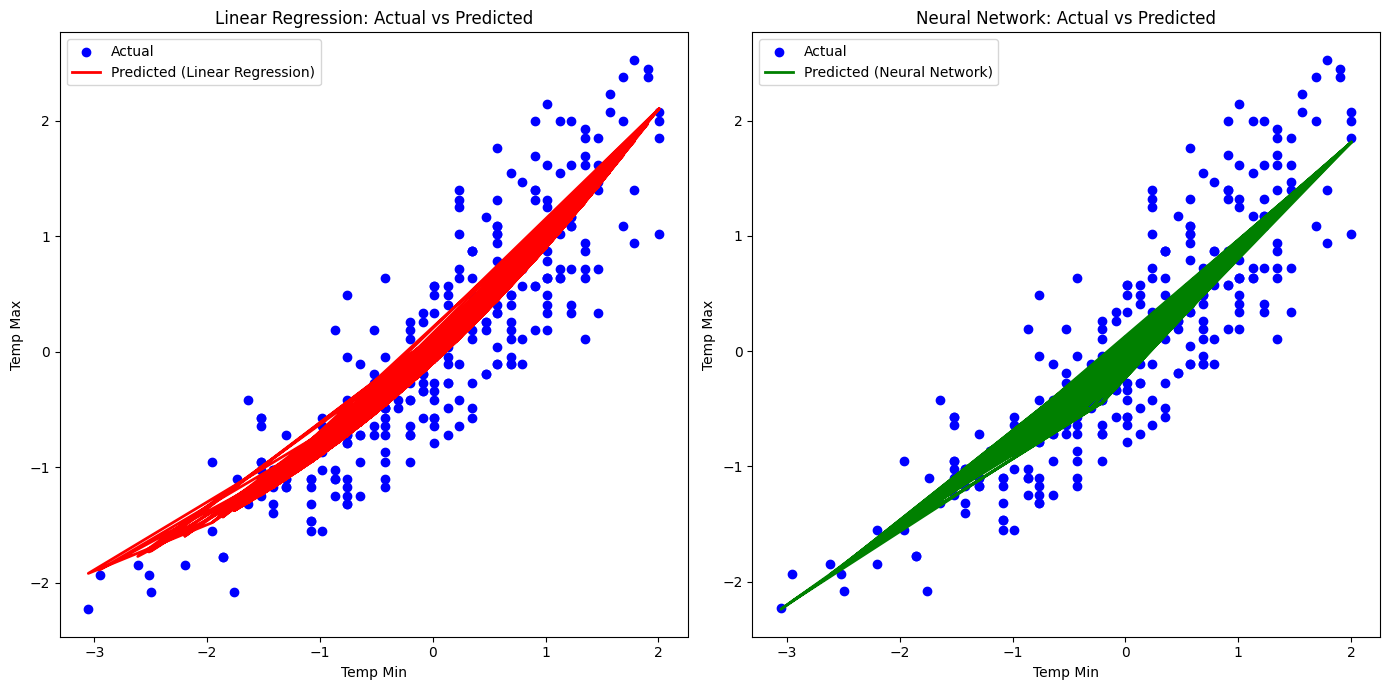

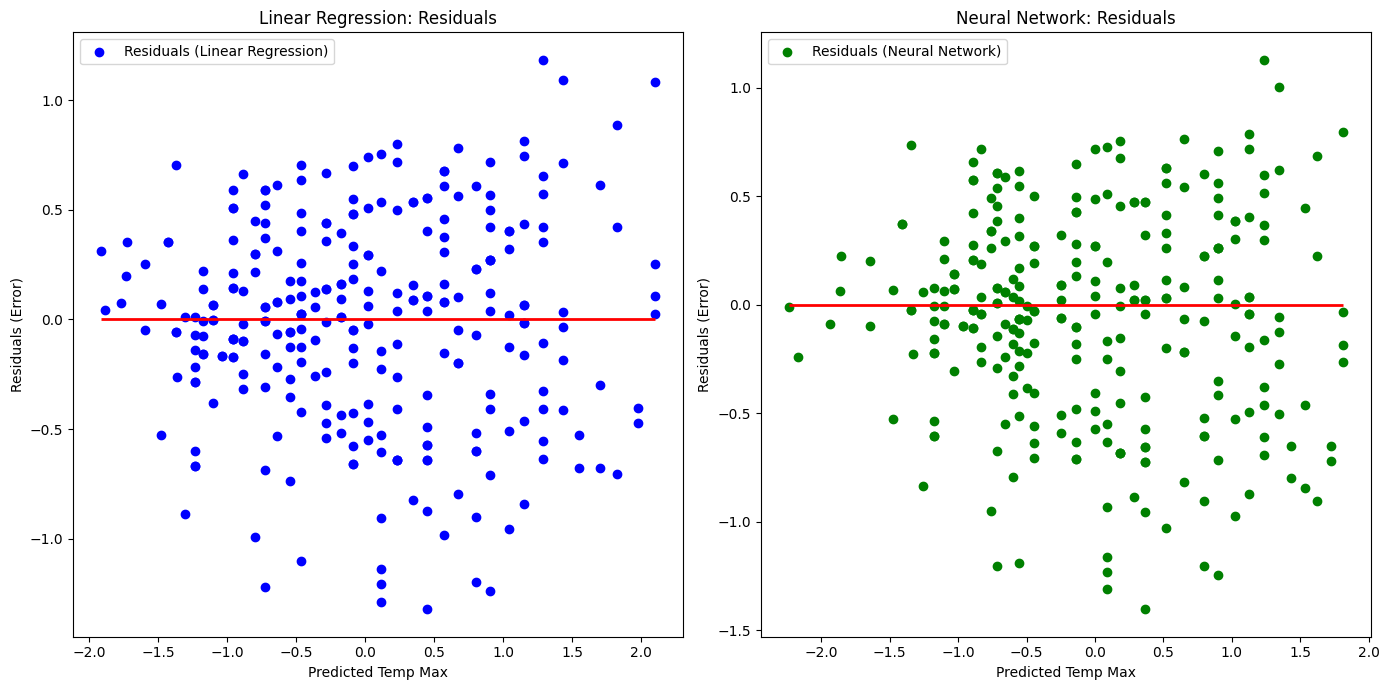


Comparison of Linear Regression vs Neural Network:
---------------------------------------------------
Linear Regression - MAE: 0.37, MSE: 0.23, R²: 0.78
Neural Network - MAE: 0.37, MSE: 0.23, R²: 0.78


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming 'impure_data' is the DataFrame containing the weather data

# Step 1: Standardize numerical features
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
scaler = StandardScaler()
standardized_data = impure_data.copy()
standardized_data[numerical_cols] = scaler.fit_transform(impure_data[numerical_cols])

# Step 2: Prepare data for regression (temp_min -> temp_max)
X = standardized_data[['temp_min']].dropna()  # Exclude rows with NaN
y = standardized_data['temp_max'].dropna()

# Align X and y after NaN handling
aligned_data = pd.merge(X, y, left_index=True, right_index=True)
X = aligned_data.iloc[:, 0].values.reshape(-1, 1)
y = aligned_data.iloc[:, 1].values

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
# Add polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_poly_train, y_train)

# Predictions for Linear Regression
y_pred_lr = linear_regressor.predict(X_poly_test)

# --- Model 2: Neural Network ---
# Define Neural Network model
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Output layer
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train Neural Network model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predictions for Neural Network
y_pred_nn = nn_model.predict(X_test)

# Make sure the predictions are of the same size as the test labels
y_pred_nn = y_pred_nn.flatten()  # Flatten the predictions array

# --- Plotting the Actual vs Predicted Values ---
# Plot for Linear Regression
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='red', label='Predicted (Linear Regression)', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Temp Min')
plt.ylabel('Temp Max')
plt.legend()

# Plot for Neural Network
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_nn, color='green', label='Predicted (Neural Network)', linewidth=2)
plt.title('Neural Network: Actual vs Predicted')
plt.xlabel('Temp Min')
plt.ylabel('Temp Max')
plt.legend()

plt.tight_layout()
plt.show()

# Optional: For better visualization, you can also plot predictions vs residuals (errors)
# Plot Residuals for Linear Regression
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_lr, y_pred_lr - y_test, color='blue', label='Residuals (Linear Regression)')
plt.hlines(y=0, xmin=min(y_pred_lr), xmax=max(y_pred_lr), color='red', linewidth=2)
plt.title('Linear Regression: Residuals')
plt.xlabel('Predicted Temp Max')
plt.ylabel('Residuals (Error)')
plt.legend()

# Plot Residuals for Neural Network
plt.subplot(1, 2, 2)
plt.scatter(y_pred_nn, y_pred_nn - y_test, color='green', label='Residuals (Neural Network)')
plt.hlines(y=0, xmin=min(y_pred_nn), xmax=max(y_pred_nn), color='red', linewidth=2)
plt.title('Neural Network: Residuals')
plt.xlabel('Predicted Temp Max')
plt.ylabel('Residuals (Error)')
plt.legend()

plt.tight_layout()
plt.show()

# --- Evaluation Results ---
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Print results
print("\nComparison of Linear Regression vs Neural Network:")
print("---------------------------------------------------")
print(f"Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Neural Network - MAE: {mae_nn:.2f}, MSE: {mse_nn:.2f}, R²: {r2_nn:.2f}")


In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluate
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree - MAE: {mae_tree:.2f}, MSE: {mse_tree:.2f}, R²: {r2_tree:.2f}")


Decision Tree - MAE: 0.39, MSE: 0.24, R²: 0.77


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest - MAE: 0.39, MSE: 0.24, R²: 0.77


In [19]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluate
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVM - MAE: {mae_svr:.2f}, MSE: {mse_svr:.2f}, R²: {r2_svr:.2f}")


SVM - MAE: 0.38, MSE: 0.24, R²: 0.77


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)
print(f"Gradient Boosting - MAE: {mae_gbm:.2f}, MSE: {mse_gbm:.2f}, R²: {r2_gbm:.2f}")


Gradient Boosting - MAE: 0.39, MSE: 0.24, R²: 0.77


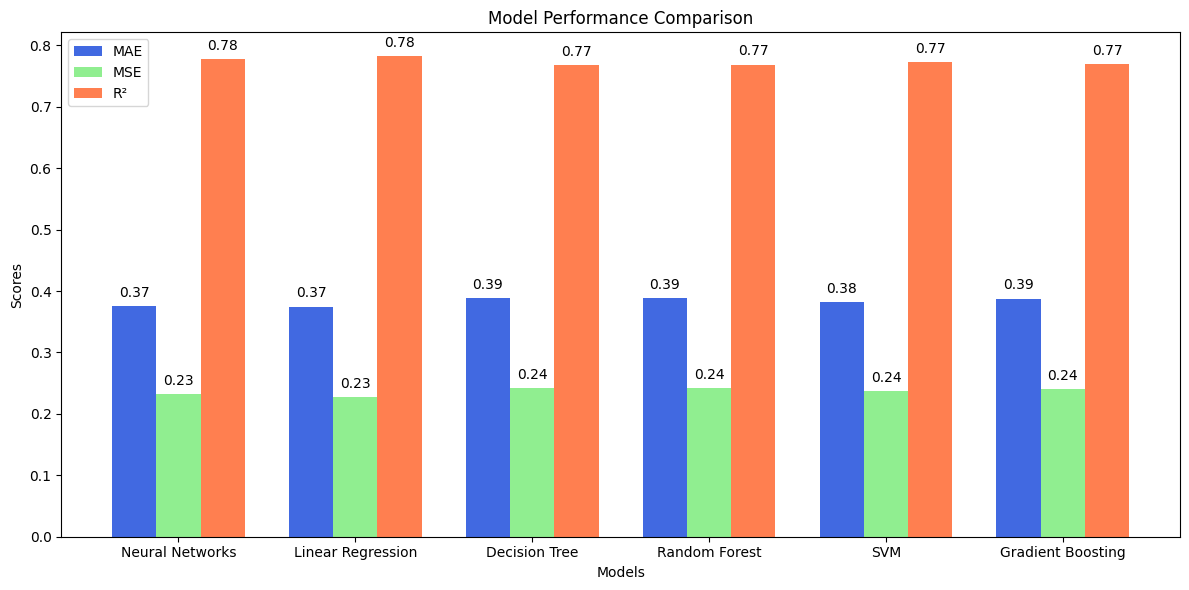

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the model evaluation metrics from the training process
# Replace these with your actual model results after training

# Model evaluation metrics (Replace these with the actual values from your models)
models = ['Neural Networks', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting']

# Replace the following values with the results after training the models
mae_scores = [mae_nn, mae_lr, mae_tree, mae_rf, mae_svr, mae_gbm]  # MAE values for each model
mse_scores = [mse_nn, mse_lr, mse_tree, mse_rf, mse_svr, mse_gbm]  # MSE values for each model
r2_scores = [r2_nn, r2_lr, r2_tree, r2_rf, r2_svr, r2_gbm]  # R² values for each model

# Bar width and positions
bar_width = 0.25
index = np.arange(len(models))

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bars for each metric
bar1 = ax.bar(index - bar_width, mae_scores, bar_width, label='MAE', color='royalblue')
bar2 = ax.bar(index, mse_scores, bar_width, label='MSE', color='lightgreen')
bar3 = ax.bar(index + bar_width, r2_scores, bar_width, label='R²', color='coral')

# Labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

# Show the plot
plt.tight_layout()
plt.show()
